In [1]:
# Bachelorarbait-2021
# Author: Michel Bosris Djifack
# Matrikelnummer:7103963

In [2]:
# A sentiment analysis program will be designed to make predictions about the english written expressions to rank them and 
# determine which ones are in favor of the coronavirus vaccine and which are against.
# Method: SVM (support vector machine)
# ===> two classes with rbf kernel

# SVM-Prototype-1

In [3]:
"""
import all libraries (Math-function, diagram-visualisation, regex, document and NLP functions)

"""
# NLP Libraries
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Math, documents and visualisation Libraries
import numpy as np
import preprocessor as p
import pandas as pd
import random
import re
import matplotlib.pyplot as plt
import colorama
from colorama import Fore

print(f"{Fore.MAGENTA}------------------- All libraries have been successfully imported.------------------- ")

------------------- All libraries have been successfully imported.------------------- 


In [4]:
"""
upload The dataset, open it and check it.

"""

# upload the DataSet
file = open('covidVaccineAdvice_mldata_d3.csv',encoding="utf-8")
data = pd.read_csv(file,delimiter=";")
print(f"{Fore.MAGENTA}------------------- The document has been successfully uploaded. ------------------- ")

------------------- The document has been successfully uploaded. ------------------- 


In [5]:
# Look at the document header.
print(f"{Fore.MAGENTA} -------------------  overview of the dataset ------------------- ")
data.head()

 -------------------  overview of the dataset ------------------- 


,id,message,sentiment
0,1,We need to be vaccinated to protect all person...,Positive
1,3,Negative,Negative
2,2,it is a pleasure to see how the govement are w...,Positive
3,6,I do not know what to think about vaccines as ...,Negative
4,4,The most popular vaccine that i know is Modern...,Positive


In [6]:
#count the data set
print(f"{Fore.MAGENTA} -------------------  The document has", data.shape[0], "rows and", data.shape[1],"columns ------------------- ")

 -------------------  The document has 1022 rows and 3 columns ------------------- 


In [7]:
# check missing values
count =data.isnull().sum().sort_values(ascending=False)
percentage =((data.isnull().sum()/len(data)*100)).sort_values(ascending=False)
missing_data =pd.concat([count,percentage],axis=1,keys=['count','Percentage'])

print(f"{Fore.MAGENTA}------------------- the number and percentage of missing values in the data set. ------------------- ")
missing_data

------------------- the number and percentage of missing values in the data set. ------------------- 


,count,Percentage
id,0,0.0
message,0,0.0
sentiment,0,0.0


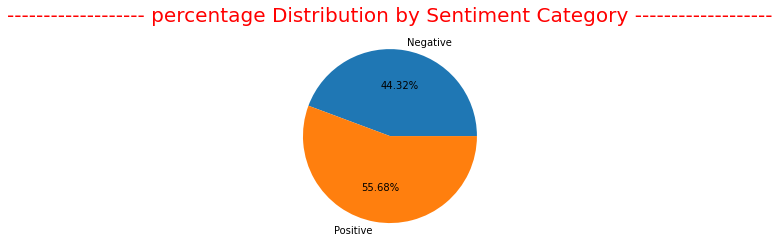

In [8]:
#check the Distributin of Sentiments
category = ['Negative','Positive']
values = [data.sentiment.str.count("Negative").sum(),data.sentiment.str.count("Positive").sum()]
plt.pie(values, labels= category,autopct ='%0.2f%%')
plt.title('------------------- percentage Distribution by Sentiment Category -------------------',fontsize=20,color='red')
plt.show()

In [9]:
"""
We will now clean the data by removing the special characters.

"""
#set up punctuations we want to be replaced
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})|(\=)|(\#)|(\§)")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")
print(f"{Fore.BLUE}------------------- Special characters and punctuation cleaning operations completed. ------------------- ")

------------------- Special characters and punctuation cleaning operations completed. ------------------- 


In [10]:
# custum function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_tweets(df):
  tempArr = []
  for line in df:
    # send to tweet_processor
    tmpL = p.clean(line)
    # remove puctuation
    tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
    tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
    tempArr.append(tmpL)
  return tempArr

print(f"{Fore.BLUE}------------------- preparation of the cleaning functions completed. ------------------- ")

------------------- preparation of the cleaning functions completed. ------------------- 


In [11]:
# Cleaning up tweets
clean_tweet = clean_tweets(data["message"])
print(f"{Fore.BLUE}------------------- The message cleaning operation is complete. ------------------- ")

------------------- The message cleaning operation is complete. ------------------- 


In [12]:
# append cleaned tweets to the training data
clean_tweet = pd.DataFrame(clean_tweet)
data["clean"] = clean_tweet
print(f"{Fore.BLUE}------------------- The clean data column has been successfully added to the dataset. ------------------- ")

------------------- The clean data column has been successfully added to the dataset. ------------------- 


In [13]:
# compare the cleaned and uncleaned tweets
print(f"{Fore.BLUE}------------------- overview of the dataset with the clean_data column. ------------------- ")
data.head()

------------------- overview of the dataset with the clean_data column. ------------------- 


,id,message,sentiment,clean
0,1,We need to be vaccinated to protect all person...,Positive,we need to be vaccinated to protect all person...
1,3,Negative,Negative,negative
2,2,it is a pleasure to see how the govement are w...,Positive,it is a pleasure to see how the govement are w...
3,6,I do not know what to think about vaccines as ...,Negative,i do not know what to think about vaccines as ...
4,4,The most popular vaccine that i know is Modern...,Positive,the most popular vaccine that i know is modern...


In [14]:
"""
In this section we will split the dataset, build a pipeline, train the model, test it 
and publish a statistical report of the performance. 

"""
# select the Target and the features
x = data['clean']
y = data['sentiment']

# convert features to vector
tfidf= TfidfVectorizer(max_features=2540, ngram_range=(1,3))
x = tfidf.fit_transform(x)
print(x.shape)


(1022, 2540)


In [15]:
# Split the data: use 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=0)

print(f"{Fore.GREEN}------------------- The data was successfully split. ------------------- ")

------------------- The data was successfully split. ------------------- 


In [16]:
# create a pipeline
# SVM classifier, with rbf kernel


pipeline = Pipeline([
      ('clf', SVC(kernel='rbf', C=2)),
    ])
print(f"{Fore.GREEN}------------------- The pipeline was created. ------------------- ")

------------------- The pipeline was created. ------------------- 


In [17]:
# train the model
pipeline.fit(X_train, y_train)
print(f"{Fore.GREEN}-------------------  The model was trained. ------------------- ")

-------------------  The model was trained. ------------------- 


In [18]:
# test the model
y_predicted = pipeline.predict(X_test)
print(f"{Fore.GREEN}------------------- The model was tested . ------------------- ")

------------------- The model was tested . ------------------- 


In [19]:
# print the classification report
print(metrics.classification_report(y_test, y_predicted))
print(f"{Fore.GREEN}------------------- The classification report was printed. ------------------- ")

              precision    recall  f1-score   support

    Negative       0.78      0.73      0.76        85
    Positive       0.82      0.86      0.84       120

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.80       205
weighted avg       0.80      0.80      0.80       205

------------------- The classification report was printed. ------------------- 


In [20]:
# calculate and print the model testing metrics
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted, average='weighted')
recall = recall_score(y_test, y_predicted, average='weighted')
f1 = f1_score(y_test, y_predicted, average='weighted')
print('Accuracy: ', "%.2f" % (accuracy*100))
print('Precision: ', "%.2f" % (precision*100))
print('Recall: ', "%.2f" % (recall*100))
print('F1: ', "%.2f" % (f1*100))
print(f"{Fore.GREEN}------------------- Print the model testing metrics. ------------------- ")

Accuracy:  80.49
Precision:  80.39
Recall:  80.49
F1:  80.37
------------------- Print the model testing metrics. ------------------- 


In [21]:
#Simulate the model with unknow values

# you cn write your own sentences on e and f nd check the result
a = ["a vaccine no i am not interested."]
b = ["There are times when I wonder why it is free. Anything that is free is dangerous. So i will never get it."]
c = ["I have my two doses and I am still alive. I am waiting for the others to find my freedom."]
d = ["Vaccination is very important. Also the vaccination against covid19."]

print(f"{Fore.GREEN}------------------- The simulation messages were successfully recorded.. ------------------- ")

------------------- The simulation messages were successfully recorded.. ------------------- 


In [22]:
# clean the values
clean_textA = clean_tweets(a)
clean_textB = clean_tweets(b)
clean_textC = clean_tweets(c)
clean_textD = clean_tweets(d)

print(f"{Fore.GREEN}------------------- The simulation messages cleaning operation is complete.. ------------------- ")

------------------- The simulation messages cleaning operation is complete.. ------------------- 


In [23]:
vec_1= tfidf.transform(clean_textA)
vec_2= tfidf.transform(clean_textB)
vec_3= tfidf.transform(clean_textC)
vec_4= tfidf.transform(clean_textD)

In [24]:
#make predictions and display the result
pred1 = pipeline.predict(vec_1)
pred2 = pipeline.predict(vec_2)
pred3 = pipeline.predict(vec_3)
pred4 = pipeline.predict(vec_4)

print(f"{Fore.GREEN}------------------- Check the result of Simulation process. ------------------- ")


print(f"{Fore.BLACK} 1 --> display: ",pred1," instead of: Negative")
print(f"{Fore.BLACK} 2 --> display: ",pred2," instead of: Negative")
print(f"{Fore.BLACK} 3 --> display: ",pred3," instead of: Positive")
print(f"{Fore.BLACK} 4 --> display: ",pred4," instead of: Positive")
print(f"{Fore.GREEN}------------------- The first SVM prototype is completed. ------------------- ")

------------------- Check the result of Simulation process. ------------------- 
 1 --> display:  ['Negative']  instead of: Negative
 2 --> display:  ['Negative']  instead of: Negative
 3 --> display:  ['Positive']  instead of: Positive
 4 --> display:  ['Positive']  instead of: Positive
------------------- The first SVM prototype is completed. ------------------- 
